# <center>Examples of numerical integration</center>

Numerical integration evaluates the function at a set of points (most simply, but not necessarily, evenly spaced) between the integration limits and evaluates the integral by approximating the function between the points.  The functions we are using here employ [quadrature interpolation](https://en.wikipedia.org/wiki/Numerical_integration#Quadrature_rules_based_on_interpolating_functions)
 to approximate the function.  This won't work if one of the limits is at infinity.
 
We are using the [scipy](http://docs.scipy.org/doc/scipy/reference/)  numerical library.  Unlike Mathematica (and MatLab?) It requires that 1-, 2-, and 3-dimensional integrals be evaluated by different functions: `quad`, `dblquad`, and `tplquad` respectively.  

**Simple integral** (one variable):
$\int_0^1 x^2 dx$.

In [3]:
# Import only the specified function, quad, from the library.
from scipy.integrate import quad 

def integrand(x):
    return x**2

ans, err = quad(integrand, 0, 1)

print ("ans =", "{:5.4f}".format(ans),".     This is the result.")
print ("err =", "{:5.3e}".format(err),".  An estimate of the error.")

ans = 0.3333 .     This is the result.
err = 3.701e-15 .  An estimate of the error.


**Note:**  You don't pass "`integrand(x)`" to the `quad` function.  It only needs to know the name of the function you want to integrate.

You can avoid having to define the `integrand(x)` function by using the `lambda` syntax to define the integration function where it's used.  This is useful (makes the code more legible) if you don't intend to use the function anywhere else.<br>  Here, "`lambda x: x**2`" defines an unnamed function $f(x) = x^2$:

In [4]:
# Same as above, using `lambda` syntax.
from scipy.integrate import quad

ans, err = quad(lambda x: x**2, 0, 1)

print ("ans =", "{:5.3f}".format(ans))
print ("err =", "{:5.3e}".format(err))

ans = 0.333
err = 3.701e-15


**Double integral** (two variables):
$\int_\pi^{2\pi}\int_0^\pi \left(y\sin(x)+x\cos(y)\right) dy dx$.

In [5]:
from scipy.integrate import dblquad
import numpy as np

# y must be the first argument, and x the second, because we're integrating over y first.
def integrand(y, x):
    return y*np.sin(x) + x*np.cos(y)

ans, err = dblquad(integrand, 
                   np.pi, 2*np.pi,               # x limits.  numpy knows
                   lambda z: 0, lambda z: np.pi) # y limits.  about pi.

print ("ans =", "{:5.3f}".format(ans))
print ("err =", "{:5.3e}".format(err))

ans = -9.870
err = 1.096e-13


**Double integral** with non-constant y limit.  This is an integral over a trapezoidal region of the `xy` plane:
$\int_\pi^{2\pi}\int_0^x \left(y\sin(x)+x\cos(y)\right) dy dx$

In [6]:
from scipy.integrate import dblquad
import numpy as np

def integrand(y, x):
    return y*np.sin(x) + x*np.cos(y)

ans, err = dblquad(integrand, 
                   np.pi, 2*np.pi,           # x limits
                   lambda q: 0, lambda q: q) # y limits (0 to x)

print ("ans =", "{:5.3f}".format(ans))
print ("err =", "{:5.3e}".format(err))

ans = -32.099
err = 3.564e-13


You can't specify the `y` limits as (0,`x`), because Python doesn't know what x is .  You have to let the `dblquad` function handle the y limits internally by giving it a function (here, a `lambda` function) that it will use to evaluate them.

**Triple integral** (three variables):
$\int_0^\pi\int_0^x\int_{-1}^{xy} \left(y\sin(x)+z\cos(x)\right) dz dy dx$.

Note: `lambda x,y: x*y` defines an unnamed function, `f(x,y) = x*y`.  In a triple integral, the `z` limits can be functions of both `x` and `y`.

In [7]:
from scipy.integrate import tplquad
import numpy as np

def integrand(z, y, x):
    return y * np.sin(x) + z * np.cos(x)

ans, err = tplquad(integrand,
                   0, np.pi,                        # x limits
                   lambda x: 0,    lambda x: x,     # y limits
                   lambda x,y: -1, lambda x,y: x*y) # z limits

print ("ans =", "{:5.3f}".format(ans))
print ("err =", "{:5.3e}".format(err))

ans = -9.552
err = 2.010e-13


### A Physics example:

Calculate the total charge in a sphere of radius = 1, given the charge density, $\rho(r,\theta,\phi) = r \sin\theta\cos^2\phi$.  We'll do the integral in spherical coordinates:
$\int_0^1\int_0^\pi\int_0^{2\pi} \left(r\sin\theta\cos^2\phi\right) \left(r^2 \sin\theta\right) d\phi d\theta dr$.  Remember the volume factors.

In [8]:
from scipy.integrate import tplquad
import numpy as np

# We're integrating over phi first, so order the arguments that way.
# Strictly speaking, it's only necessary for integrand(), but it's
# less confusing to do rho the same way.
def rho(p,t,r):
    return r * np.sin(t) * (np.cos(p))**2
                                    
def integrand(p,t,r):
    return rho(p,t,r) * (r**2 * np.sin(t))

Q, err = tplquad(integrand,
                 0, 1,                               # r limits
                 lambda x: 0,   lambda x: np.pi,     # theta limits
                 lambda x,y: 0, lambda x,y: 2*np.pi) # phi limits

print ("Q   =", "{:5.4f}".format(Q))
print ("err =", "{:5.3e}".format(err))

Q   = 1.2337
err = 1.370e-14


<font color=blue>A physics question that you can answer using this code:</font><br> What happens to `Q` if you double the radius of the sphere?

## How to deal with kinks and discontinuities.
Sometimes functions have kinks.  For example, a triangle:
<pre>
f(x) =  x  if  0  < x < 1/2
     = 1-x if 1/2 < x <  1
     =  0  outside the 0:1 interval.
</pre>

Sometimes they have discontinuities:  For example, a sawtooth:
<pre>
f(x) =  x    if  0  < x < 1/2
     = x-1/2 if 1/2 < x <  1
     =  0    outside the 0:1 interval.
</pre>
<img src="functions.jpg" align="center" width = 60%>

<font color=blue>How can we integrate these functions?</font>  We need to be able to define the integrand as a single Python functon that will deal with the fact that the functional form is different in different `x` regions. 

We need to use an `if` statement.  In its simplest form, it looks like this:
<pre>
if test_quantity:
    do something          # These statements will be executed
    do something else     # only if test_quantity is true.
do this no matter what
</pre>
The layout of the code is a similar to that of the `for` and `def` constructs, including the colon and indentation.

There are two other forms, that allow alternatives to be tested:
<pre>
if test1:
    do something        # Done if test1 is true.
else:
    do something else   # Done if test1 is false.
do this no matter what
</pre>
and
<pre>
if test1:
    do something     # Do if test1 is true.
elif test2:          # elif is shorthand for "else if".
    do something 2   # Do if test1 is false and test2 is true.
elif test3:
    do something 3   # Previous tests failed but test3 is true.
else:
    do something 4   # All previous tests failed.
do this no matter what
</pre>
You can have as many `elif`s as you need.  The final `else` is optional.  If a test succeeds, its code is executed, and no subsequent tests are performed.

[Here](http://www.tutorialspoint.com/python/python_basic_operators.htm) is a list of Python operators, including the arithmetic comparisons. 

Using this, here's how we can define the triangle function:

In [9]:
from scipy.integrate import quad

def integrand(x):
    if   x < 0:    # if x < 0, then f = 0.
        return 0
    elif x < 0.5:  # x > 0;   is it < 0.5?
        return x
    elif x < 1:    # x > 0.5; is it < 1?
        return 1-x
    else:
        return 0   # Other tests failed.  Thus, x > 1, and f = 0.

ans, err = quad(integrand, 0, 1)

print ("ans =", "{:5.3f}".format(ans))
print ("err =", "{:5.3e}".format(err))

ans = 0.250
err = 2.776e-15


We could simplify the code by using a more complex test at the beginning.

In [10]:
from scipy.integrate import quad

def integrand(x):
    if x < 0 or x >= 1:  # `>=` means "equal to or greater than"
        return 0
    elif x < 0.5:
        return x
    else:
        return 1-x       # The other tests failed, so we have this.
    
ans, err = quad(integrand, 0, 1)

print ("ans =", "{:5.3f}".format(ans), "err =", "{:5.3e}".format(err))

# Just for fun, integrate beyond the 0:1 interval:
ans, err = quad(integrand, -1, 2)
print ("ans =", "{:5.3f}".format(ans), "err =", "{:5.3e}".format(err))

ans = 0.250 err = 2.776e-15
ans = 0.250 err = 2.776e-16


# When is numerical integration useful?

All of the above integrals can be done analytically, and the numerical values obtained by plugging into the result.  This is not always possible:  

* Sometimes, the integral has no closed form solution.
* Sometimes the integrand is not a function, but a table of numbers (*e.g.*, measurement results from an experiment).

### Let's look at the potential produced by a charged, circular loop.

Let the loop have radius $R$, lying in the $xy$ plane.  Thus, $z=0$, and $x^2+y^2=R^2$.  <br>If it has total charge, $Q$, the linear charge density is $\lambda=\frac{Q}{2{\pi}R}$.

First, look at the potential on axis ($x=y=0$, $z\neq0$).  In this case, every point on the loop is the same distance, $d=\sqrt{z^2+R^2}$ from the point of interest, so $V(z)=Q/4\pi\epsilon_0d$.

However, when we want $V(x,y,z)$ off axis (let $x\neq0$, but keep $y=0$), we must integrate, because $d$ varies around the loop: $d=\sqrt{z^2+(R\sin\theta)^2+(R\cos\theta-x)^2}$, where $\theta$ is the polar angle (from the $x$-axis) of a point on the loop.  Thus:
$$V(x,0,z)=\frac{Q}{2{\pi}R}\frac{1}{4\pi\epsilon_0}\int_0^{2\pi}{\frac{d\theta}{\sqrt{z^2+(R\sin\theta)^2+(R\cos\theta-x)^2}}}.$$
Unfortunately, this is an elliptic integral and must be evaluated numerically. 

Let's evaluate the integral in Python:

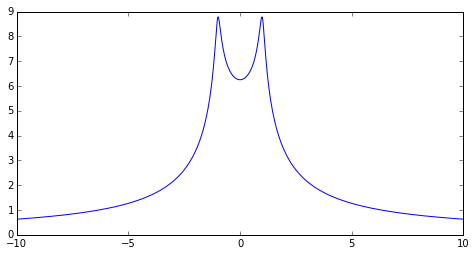

In [11]:
import numpy as np
# This is a 1-D integral.
from scipy.integrate import quad 

# We'll plot the results.
import matplotlib.pyplot as plt
import matplotlib as mpl
# Display the plots here (inline).
%matplotlib inline                     
mpl.rcParams['figure.figsize']=[8,4]  # Set H and V sizes of plots.



# Define the integration to be a function of the position of the
# observation point.  That will let us graph the results.
# For legibility, I'll ignore all the constants (except Q) in 
# front of the integral.
def V(x,y,z,R,Q):
    # This is where the integration is done. 
    def integrand(theta):
        return 1/np.sqrt(z**2+(R*np.sin(theta))**2+(R*np.cos(theta)-x)**2)
    ans,err = quad(integrand,0,2*np.pi)
    # Return the result, but not the error estimate.
    return Q*ans

# Make a graph of V along the line (x,y=0,z=0.1) by evaluating it at 
# a sequence of x values and filling a list of points to plot.
y=0
z=0.1
R=1
Q=1
xmin    = -10.0  # Remember to tell Python that some quantities
xmax    = +10.0  # that look like integers are actually reals.
npoints =  1001  # Otherwise xstep will be truncated to zero.
xstep   = (xmax-xmin)/(npoints-1)

# Create the lists of plot coordinates.
xx = [xmin + i*xstep   for i in range(0,npoints)] # The  x   values.
yy = [V(xx[i],y,z,R,Q) for i in range(0,npoints)] # The V(x) values.

plt.plot(xx,yy)
plt.show()



You can vary `z` to see what happens.  If you set `z = 0`, the `quad` function will complain.  The reason is that the line goes through `(±R,0,0)`, where `V` diverges.  The `quad` function can't deal with singularities.

I made `npoints` large because, if it is too small, the plot  will look jagged near the wire, and the sharp peaks will be missed.  You need to have closely spaced plot points.  Compare `npoints = 1001` with `npoints = 51` when `z = 0.01`.

We can plot several `z` values at once.  The obscure `plt.plot()` arguments control the look of the graphs.  Documentation is [here](http://matplotlib.org/api/pyplot_api.html?highlight=plot#matplotlib.pyplot.plot).

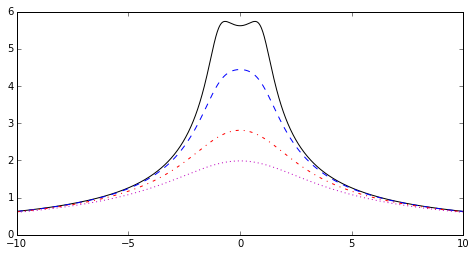

In [12]:
xx = [xmin + i*xstep   for i in range(0,npoints)]
z = 0.5
y05 = [V(xx[i],y,z,R,Q) for i in range(0,npoints)]
z = 1
y1 = [V(xx[i],y,z,R,Q) for i in range(0,npoints)]
z = 2
y2 = [V(xx[i],y,z,R,Q) for i in range(0,npoints)]
z = 3
y3 = [V(xx[i],y,z,R,Q) for i in range(0,npoints)]

#plt.xlim(1.01*xmin,1.01*xmax)
#plt.ylim(0,7)
plt.plot(xx,y05, 'k-')  # Black, solid line
plt.plot(xx,y1,  'b--') # Blue, dashed line
plt.plot(xx,y2,  'r-.') # Red, dash-dot line
plt.plot(xx,y3,  'm:')  # Magenta, dotted line
plt.show()

Notice that far from the loop (*i.e.*, `|x| > 5R`, or so), the graphs begin to look the same.  You'll understand this behavior when you study multipole moments in P436.  In a nutshell, far from the object only the total charge is important, not the shape.

We can display the graphs interactively with sliders:

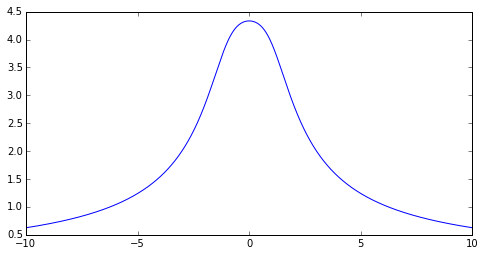

None

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.html.widgets import interact

def V(x,y,z,R,Q):
    def integrand(theta):
        return 1/np.sqrt(z**2+(R*np.sin(theta))**2+(R*np.cos(theta)-x)**2)
    ans,err = quad(integrand,0,2*np.pi)
    return Q*ans

def plotV(z = 1.0, npoints = 1001):
    y     = 0.0
    R     = 1.0
    Q     = 1.0
    xmin = -10*R
    xmax = +10*R
    xstep = (xmax-xmin)/(npoints-1)

    # Create the lists of plot coordinates.
    xx = [xmin + i*xstep   for i in range(0,npoints)] # The  x   values.
    yy = [V(xx[i],y,z,R,Q) for i in range(0,npoints)] # The V(x) values.

    plt.plot(xx,yy)
    plt.show()

# Just generate two sliders.  You can add more.
interact(plotV, z       = (0.01, 5.0, 0.01), 
                npoints = (50,1000,50))

The `interact` function is a new iPython feature, and is still under development.  If you move the sliders there is a latency (delay) before the desired plot is shown, and some of the intermediate slider positions are briefly displayed.  This is a problem with the implementation of the `interact` function.  However, latency will always be a serious problem whenever the function to be evaluated (in our case, `V(x,y,z,R,Q)`) is complicated.  Ours is a simple integral, but if it were very complicated, it might take several seconds (or longer) to complete.  An interactive environment is less useful in situations like that.